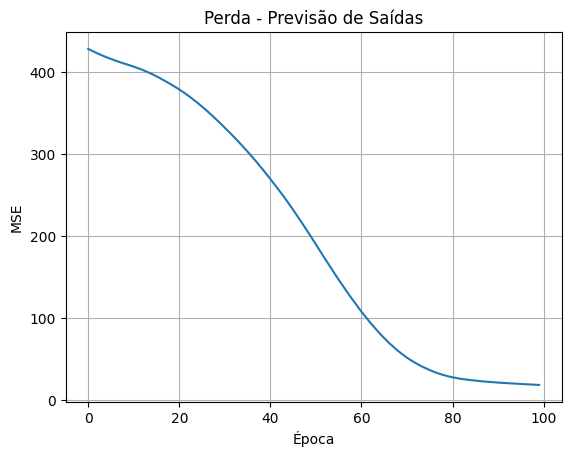

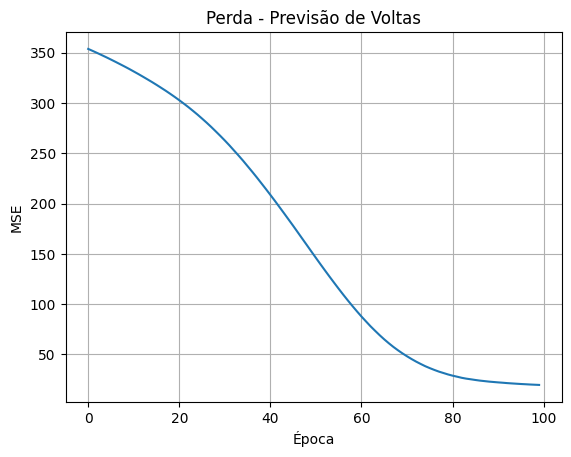

📉 Loss final (saídas): 18.1878
📉 Loss final (voltas): 19.5902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

 Previsão 1:
 Motos que vão sair:   18.40
 Motos que vão voltar: 18.02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

 Previsão 2:
 Motos que vão sair:   33.38
 Motos que vão voltar: 28.59
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

 Previsão 3:
 Motos que vão sair:   12.85
 Motos que vão voltar: 14.03
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

 Previsão 4:
 Motos que vão sair:   29.15
 Motos que vão voltar: 25.60


In [50]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# CARREGAR E PREPARAR OS DADOS
df = pd.read_csv("dados_mottu_corrigido.csv")
df['tipo_dia'] = df['tipo_dia'].map({'util': 0, 'fim_de_semana': 1})
df['galpao'] = df['galpao'].astype('category').cat.codes

X = df.drop(["motos_que_sairam", "motos_que_voltaram"], axis=1)
y_saida = df["motos_que_sairam"]
y_volta = df["motos_que_voltaram"]

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

X_treino, X_teste, y_saida_treino, y_saida_teste = train_test_split(X_norm, y_saida, test_size=0.3, random_state=42)
_, _, y_volta_treino, y_volta_teste = train_test_split(X_norm, y_volta, test_size=0.3, random_state=42)

# MODELO PARA SAÍDAS
modelo_saida = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])
modelo_saida.compile(optimizer='adam', loss='mse')
hist_saida = modelo_saida.fit(X_treino, y_saida_treino, epochs=100, verbose=0)

# MODELO PARA VOLTAS
modelo_volta = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])
modelo_volta.compile(optimizer='adam', loss='mse')
hist_volta = modelo_volta.fit(X_treino, y_volta_treino, epochs=100, verbose=0)

# PLOT DA FUNÇÃO DE PERDA
plt.plot(hist_saida.history['loss'])
plt.title("Perda - Previsão de Saídas")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

plt.plot(hist_volta.history['loss'])
plt.title("Perda - Previsão de Voltas")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# LOSS FINAL
print(f"📉 Loss final (saídas): {hist_saida.history['loss'][-1]:.4f}")
print(f"📉 Loss final (voltas): {hist_volta.history['loss'][-1]:.4f}")




In [ ]:
# PREVISÕES COM 4 EXEMPLOS
exemplos = [
    # [galpao, dia_semana, motos_em_uso, motos_que_sairam, motos_que_voltaram,
    #  motos_disponiveis, choveu, total_motos, feriado, tipo_dia, saldo_dia]

    # Quarta-feira (dia 3), dia útil, clima seco
    [0, 3, 20, 25, 18, 80, 0, 100, 0, 0, 7],  # saldo = 25 - 18

    # Domingo (dia 6), fim de semana, com chuva e feriado
    [0, 6, 10, 25, 20, 90, 1, 100, 1, 1, 5],  # saldo = 25 - 20

    # Segunda-feira (dia 0), dia útil, clima seco
    [0, 0, 30, 23, 22, 70, 0, 100, 0, 0, 1],  # saldo = 23 - 22

    # Sexta-feira (dia 5), fim de semana, com chuva
    [0, 5, 12, 25, 21, 88, 1, 100, 0, 1, 4],  # saldo = 25 - 21
]

for i, entrada in enumerate(exemplos, start=1):
    entrada_df = pd.DataFrame([entrada], columns=df.columns)
    entrada_df['tipo_dia'] = entrada_df['tipo_dia'].map({0: 0, 1: 1})
    entrada_df['galpao'] = entrada_df['galpao'].astype(int)

    entrada_norm = scaler.transform(entrada_df.drop(["motos_que_sairam", "motos_que_voltaram"], axis=1))
    pred_saida = modelo_saida.predict(entrada_norm)
    pred_volta = modelo_volta.predict(entrada_norm)

    print(f"\n Previsão {i}:")
    print(f" Motos que vão sair:   {pred_saida[0][0]:.2f}")
    print(f" Motos que vão voltar: {pred_volta[0][0]:.2f}")